In [1]:
# Common useful packages
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import copy
import spectral

import sys
sys.path.append('/workspaces/Machine-Learning-for-Spectral-Imaging/Book_Modules/')

# module that is useful for reloading packages
import importlib

# Scripts associated with the SML4SI textbook
import hyperspectral_gta_data as hsi_data
import scripts_M2 as sm2

# set the directory where data will be downloaded and accessed
# (This directory will be saved in a config file and used each time you use hyperspectral_gta_data, 
# so you don't need to run the 'set_data_dir' function every time you use hyperspectral_gta_data.)
hsi_data.set_data_dir('/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/')


# 1. Download the data

In [6]:
# Here are the datasets available through the hyperspectral_gta_data package
hsi_data.available_datasets()

Available Images:
   WashingtonDC
   MicroscenePolymers
   Detection_Imagery_Cooke_City_RIT
   VegBaccharisUPWINS
   PaintDetectionUPWINS
   indian_pines
   pavia_centre
   pavia_university
Available Spectral Libraries:
   GHISACONUS_2008_001_speclib
   Microscene_Polymers_Library
   UPWINS_4_16_2024
   Detection_Library_Cooke_City_RIT


## Download the hyperspectral image

In this case, we will be using a hyperspectral image from the RIT test over Cooke City, Montana. (https://dirsapps.cis.rit.edu/blindtest/)

In [7]:
# Download and use the Cooke Cite image:
hsi_data.download('VegBaccharisUPWINS')
fname = hsi_data.get_fname('VegBaccharisUPWINS')

Downloading...
From (original): https://drive.google.com/uc?id=1e5SloCAzXGIfDRlzhqYcmQ5JUMC8DweC
From (redirected): https://drive.google.com/uc?id=1e5SloCAzXGIfDRlzhqYcmQ5JUMC8DweC&confirm=t&uuid=5c023b6b-dcce-4a4e-8fe8-e985841ff292
To: /workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS.zip
100%|██████████| 86.2M/86.2M [00:02<00:00, 37.2MB/s]


File saved as: /workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref
File saved as: /workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref.hdr
 
Available Files:
/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref.hdr
/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref
Primary Image Filename:
/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref


In [2]:
# load the Cooke City hyperspectral iamge
fname = '/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref'
fname_hdr = '/workspaces/Machine-Learning-for-Spectral-Imaging/spectral_data/spectral_images/Vegetation_Baccharis_halmifolia_UPWINS/Morven_Baccharis_h_or_ref.hdr'

# Open the image and read into an array
im = spectral.envi.open(fname_hdr, fname)
wl_im = np.asarray(im.bands.centers)
# Load the image into memory
im.Arr = im.load()
imArr = im.Arr
print(f'Shape of ImArr = {imArr.shape}')
imList = np.reshape(imArr, (im.nrows*im.ncols, im.nbands))
print(f'Shape of imList = {imList.shape}')

Shape of ImArr = (300, 600, 343)
Shape of imList = (180000, 343)


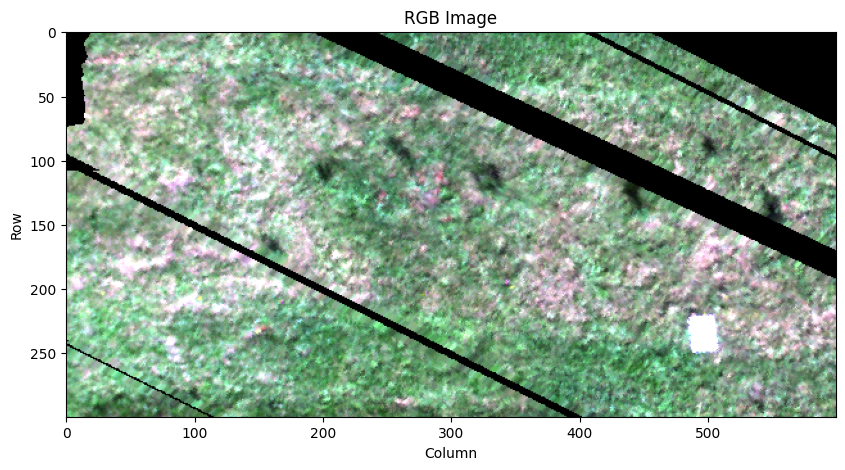

In [3]:
# display the image
sm2.display_RGB(imArr, wl_im, rotate=False)
plt.title('RGB Image');

# Create ROI Ground Truth


In [4]:
from hsiViewer import hsi_viewer_ROI as hvr
importlib.reload(hvr)
hvr.viewer(im, stretch=[2,98], rotate=True)

QLayout::addChildLayout: layout "" already has a parent


In [47]:
import pickle
fname = 'C:/spectral_data/spectral_images/CookeCityROIs.pkl'
with open(fname, 'rb') as f:
    roiData = pickle.load(f)

In [48]:
roiData.names

['F1', 'F2', 'blue fabric']

In [49]:
roiData.colors

{'F1': '#fa3232', 'F2': '#e7e89b', 'blue fabric': '#3a78ff'}

In [51]:
roiData.colors['F1']

'#fa3232'

In [52]:
roiData.masks

{'F1': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'F2': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'blue fabric': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, Fa

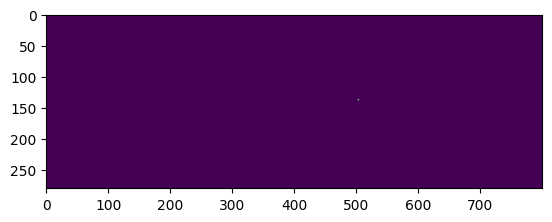

In [53]:
plt.imshow(roiData.masks['F1'])

In [54]:
roiData.df

,Name,Color,Pixel_x,Pixel_y,453.799988,467.399994,481.899994,496.899994,511.700012,526.5,...,2351.100098,2367.600098,2384.399902,2401.100098,2417.699951,2433.699951,2449.600098,2465.300049,2480.899902,2496.300049
0,F1,#fa3232,137,503,146.0,161.0,183.0,207.0,269.0,339.0,...,1012.0,972.0,926.0,877.0,824.0,786.0,743.0,674.0,679.0,735.0
1,F1,#fa3232,138,503,131.0,149.0,173.0,200.0,260.0,334.0,...,922.0,886.0,836.0,792.0,754.0,702.0,661.0,597.0,586.0,571.0
2,F1,#fa3232,137,504,135.0,161.0,175.0,201.0,268.0,338.0,...,955.0,912.0,868.0,817.0,770.0,731.0,679.0,623.0,602.0,625.0
3,F1,#fa3232,138,504,131.0,150.0,169.0,202.0,265.0,332.0,...,909.0,863.0,822.0,769.0,738.0,686.0,649.0,581.0,551.0,496.0
0,F2,#e7e89b,120,483,186.0,214.0,290.0,396.0,525.0,602.0,...,789.0,741.0,703.0,671.0,634.0,613.0,583.0,540.0,536.0,562.0
1,F2,#e7e89b,121,483,190.0,222.0,304.0,418.0,549.0,623.0,...,828.0,778.0,738.0,710.0,672.0,651.0,611.0,576.0,556.0,549.0
2,F2,#e7e89b,120,484,186.0,218.0,290.0,394.0,516.0,590.0,...,797.0,756.0,718.0,680.0,644.0,623.0,594.0,538.0,543.0,555.0
3,F2,#e7e89b,121,484,192.0,228.0,307.0,418.0,543.0,614.0,...,830.0,786.0,747.0,712.0,675.0,657.0,614.0,566.0,549.0,535.0
0,blue fabric,#3a78ff,121,493,337.0,357.0,374.0,390.0,437.0,474.0,...,895.0,849.0,809.0,764.0,727.0,676.0,660.0,576.0,595.0,472.0
1,blue fabric,#3a78ff,122,493,329.0,338.0,358.0,372.0,425.0,470.0,...,843.0,800.0,756.0,711.0,678.0,625.0,618.0,526.0,544.0,373.0
